In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('/Users/soltanhassan/Desktop/Education/Programming with Python/Test Python Code/learn&try/kaggle/input/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')


# Understand Data

In [2]:
# Display the first few rows of the dataset
print(data.head())

    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


In [3]:
# Check the dimensions of the dataset
print('Dataset Shape:', data.shape)

Dataset Shape: (4857377, 8)


In [4]:
# Check the data types of each column
print('Data Types:', data.dtypes)

Data Types: Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


In [5]:
# Summary statistics
print('Summary Statistics:')
print(data.describe())

Summary Statistics:


          Timestamp          Open          High           Low         Close  \
count  4.857377e+06  3.613769e+06  3.613769e+06  3.613769e+06  3.613769e+06   
mean   1.471301e+09  6.009024e+03  6.013357e+03  6.004488e+03  6.009014e+03   
std    8.428019e+07  8.996247e+03  9.003521e+03  8.988778e+03  8.996360e+03   
min    1.325318e+09  3.800000e+00  3.800000e+00  1.500000e+00  1.500000e+00   
25%    1.398179e+09  4.438600e+02  4.440000e+02  4.435200e+02  4.438600e+02   
50%    1.471428e+09  3.596970e+03  3.598190e+03  3.595620e+03  3.597000e+03   
75%    1.544288e+09  8.627270e+03  8.632980e+03  8.621090e+03  8.627160e+03   
max    1.617149e+09  6.176356e+04  6.178183e+04  6.167355e+04  6.178180e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  3.613769e+06       3.613769e+06    3.613769e+06  
mean   9.323249e+00       4.176284e+04    6.008935e+03  
std    3.054989e+01       1.518248e+05    8.995992e+03  
min    0.000000e+00       0.000000e+00    3.800000e+00  
25%

# Data Preprocessing

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64


In [7]:
df=data

In [8]:
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Timestamp').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

# Handling Missing Values

In [9]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

# Feature Engineering

In [10]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()

In [11]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

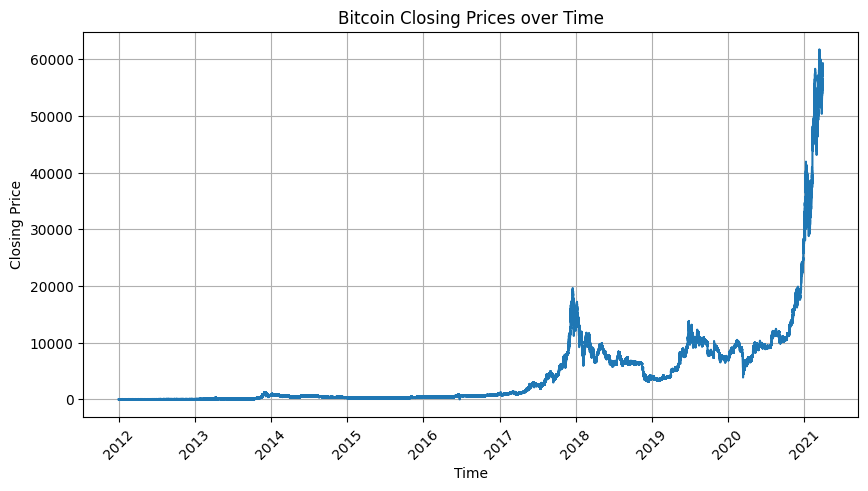

In [12]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

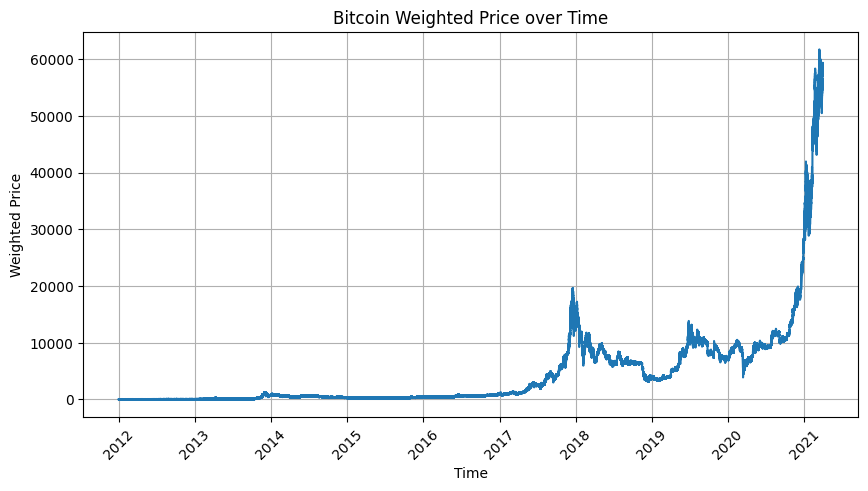

In [13]:
# Plot 2: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Weighted_Price'])
plt.title('Bitcoin Weighted Price over Time')
plt.xlabel('Time')
plt.ylabel('Weighted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

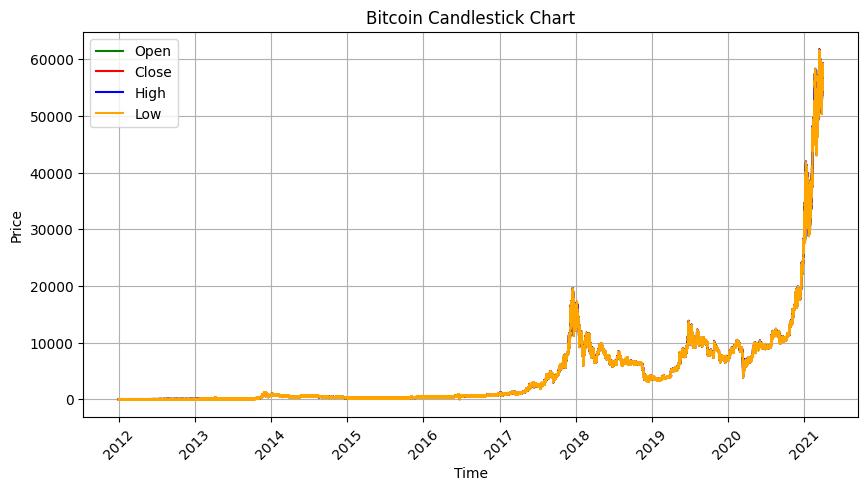

In [14]:
# Plot 3: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

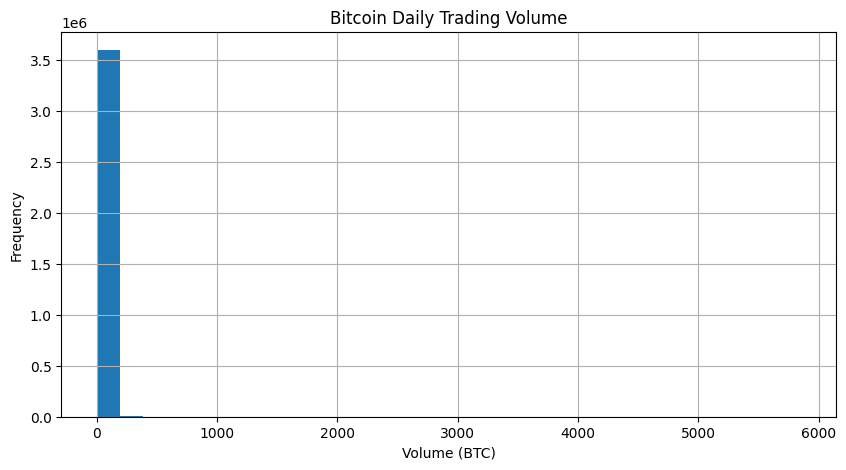

In [15]:
# Plot 4: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume_(BTC)'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

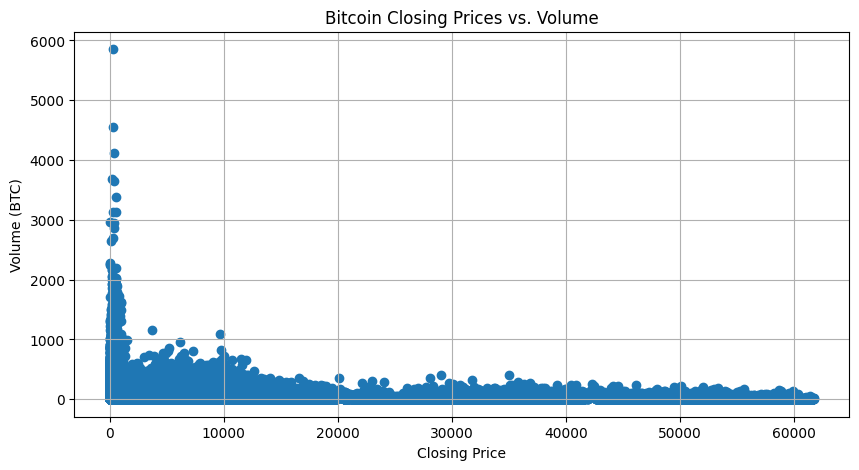

In [16]:
# Plot 5: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume_(BTC)'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

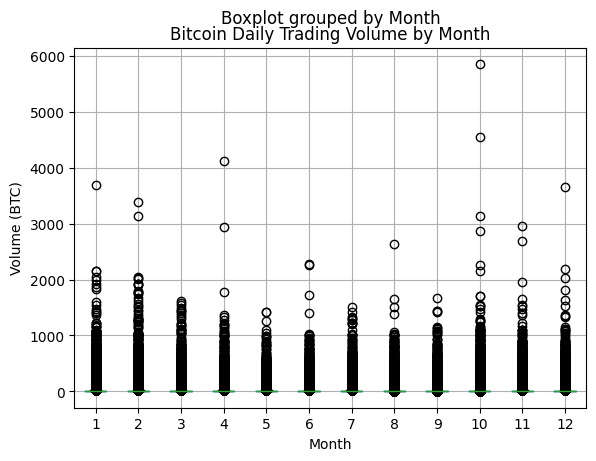

In [17]:
# Plot 6: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume_(BTC)', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

# Model Selection

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-12-25 21:09:30.187255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [20]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [21]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

In [22]:
# SARIMA model
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.85574D+00    |proj g|=  5.56259D-02


 This problem is unconstrained.



At iterate    5    f=  6.82255D+00    |proj g|=  3.41366D-03

At iterate   10    f=  6.73476D+00    |proj g|=  9.10641D-04

At iterate   15    f=  6.73408D+00    |proj g|=  5.96190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   3.108D-06   6.733D+00
  F =   6.7331943808540711     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [23]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

22/22 [==============================] - 9s 11ms/step


In [24]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [25]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 14490.546813749346
SARIMA RMSE: 13692.218756544065
LSTM RMSE: 19658.41220626626
Gradient Boosting Regressor RMSE: 14573.196791659071


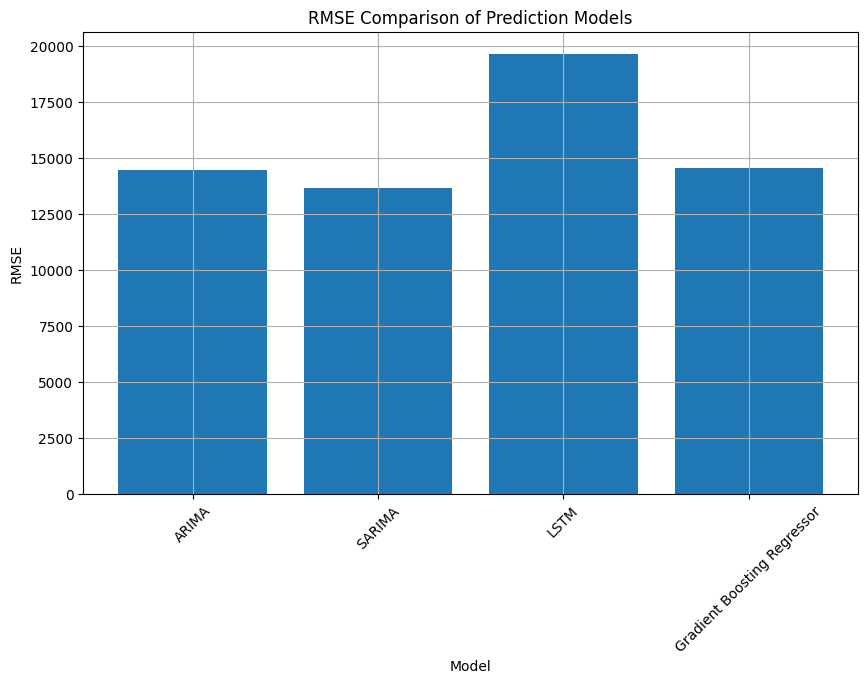

In [26]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# SARIMAX

In [27]:
###SARIMAX###
import itertools
#Constructs all possible parameter combinations.
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]


In [28]:

def sarimax_function(data,pdq,s_pdq):

    """
    The function uses a brute force approach to apply all possible pdq combinations and evaluate the model
    """

    result_list = []
    for param in pdq:
        for s_param in s_pdq:

            model = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=s_param,
            enforce_invertibility=False,enforce_stationarity=False)

            results = model.fit()
            result_list.append([param,s_param,results.aic])
            print("ARIMA Parameters: {} x: {}. AIC: {}".format(param,s_param,results.aic))

    return result_list,results

In [29]:
import statsmodels.api as sm
result_list,results = sarimax_function(df_monthly["Weighted_Price"],pdq,seasonal_pdq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04719D+01    |proj g|=  9.55325D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.553D-07   1.047D+01
  F =   10.471942894619588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA Parameters: (0, 0, 0) x: (0, 0, 0, 12). AIC: 2347.7152083947876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57104D+00    |proj g|=  7.96183D-02


 This problem is unconstrained.



At iterate    5    f=  9.56837D+00    |proj g|=  3.97261D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      7      1     0     0   3.973D-05   9.568D+00
  F =   9.5683694757882449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (0, 0, 1, 12). AIC: 2147.314762576567
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.15718D+00    |proj g|=  1.62308D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      6      1     0     0   1.598D-06   9.154D+00
  F =   9.1537159390687357     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 0, 0) x: (0, 1, 0, 12). AIC: 2052.432370351397
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12437D+00    |proj g|=  2.52020D-01


 This problem is unconstrained.



At iterate    5    f=  8.09565D+00    |proj g|=  2.41435D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     10      1     0     0   2.414D-05   8.096D+00
  F =   8.0956494116179076     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (0, 1, 1, 12). AIC: 1817.4254682024114
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20111D+00    |proj g|=  1.74332D-06

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.01358D+00    |proj g|=  1.01817D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     11      1     0     0   5.684D-05   9.014D+00
  F =   9.0135289996826913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (1, 0, 1, 12). AIC: 2025.0304959289228
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18141D+00    |proj g|=  7.90124D-07

           * * *

Tit   = total number of iterations
Tnf   = 

 This problem is unconstrained.


ARIMA Parameters: (0, 0, 0) x: (1, 1, 0, 12). AIC: 1836.6348965253674
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15745D+00    |proj g|=  3.75136D-01


 This problem is unconstrained.



At iterate    5    f=  8.09312D+00    |proj g|=  5.28018D-02

At iterate   10    f=  8.06828D+00    |proj g|=  1.62211D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   3.222D-05   8.068D+00
  F =   8.0682820043243808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 0) x: (1, 1, 1, 12). AIC: 1813.2951689686613
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06059D+01    |proj g|=  4.28470D-01


 This problem is unconstrained.



At iterate    5    f=  1.00144D+01    |proj g|=  1.01581D-01

At iterate   10    f=  1.00135D+01    |proj g|=  7.18140D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     22      1     0     0   7.181D-05   1.001D+01
  F =   10.013521272383672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 0, 0, 12). AIC: 2247.0287650139426


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.74574D+00    |proj g|=  3.54781D-01

At iterate    5    f=  9.23241D+00    |proj g|=  2.01432D-01

At iterate   10    f=  9.21898D+00    |proj g|=  2.37713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     19      1     0     0   6.667D-05   9.219D+00
  F =   9.2189773126106349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 0, 1, 12). AIC: 2071.0509180247823


 This problem is unconstrained.



At iterate    5    f=  8.76124D+00    |proj g|=  8.63358D-02

At iterate   10    f=  8.75960D+00    |proj g|=  7.36263D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     17      1     0     0   7.363D-05   8.760D+00
  F =   8.7596030380838599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 1, 0, 12). AIC: 1966.1510805307846
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86540D+00    |proj g|=  4.27908D-01


 This problem is unconstrained.



At iterate    5    f=  7.70648D+00    |proj g|=  1.98267D-02

At iterate   10    f=  7.70501D+00    |proj g|=  2.46877D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     21      1     0     0   5.955D-05   7.705D+00
  F =   7.7050091040816833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (0, 1, 1, 12). AIC: 1731.922039314297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.63686D+00    |proj g|=  4.04536D-01


 This problem is unconstrained.



At iterate    5    f=  9.05881D+00    |proj g|=  6.62719D-03

At iterate   10    f=  9.05860D+00    |proj g|=  5.73285D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   7.534D-05   9.059D+00
  F =   9.0585992616571893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 0, 0, 12). AIC: 2035.1262346112103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44177D+00    |proj g|=  3.98170D-01


 This problem is unconstrained.



At iterate    5    f=  8.86156D+00    |proj g|=  1.59617D-02

At iterate   10    f=  8.86049D+00    |proj g|=  1.92436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   7.803D-05   8.860D+00
  F =   8.8604890608613527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 0, 1, 12). AIC: 1992.7495496329432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02930D+00    |proj g|=  4.85962D-01


 This problem is unconstrained.



At iterate    5    f=  7.88159D+00    |proj g|=  6.07665D-03

At iterate   10    f=  7.88135D+00    |proj g|=  3.41548D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   6.183D-05   7.881D+00
  F =   7.8813486744470689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 0, 1) x: (1, 1, 0, 12). AIC: 1771.4221030761435
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87986D+00    |proj g|=  4.07291D-01


 This problem is unconstrained.



At iterate    5    f=  7.70266D+00    |proj g|=  1.84820D-02

At iterate   10    f=  7.69917D+00    |proj g|=  2.41067D-02

At iterate   15    f=  7.69830D+00    |proj g|=  6.19023D-05

At iterate   20    f=  7.69829D+00    |proj g|=  1.51666D-03

At iterate   25    f=  7.69768D+00    |proj g|=  2.68363D-02

At iterate   30    f=  7.68093D+00    |proj g|=  2.31668D-01

At iterate   35    f=  7.63814D+00    |proj g|=  1.21577D-01

At iterate   40    f=  7.59354D+00    |proj g|=  1.19622D-01

At iterate   45    f=  7.55521D+00    |proj g|=  5.83457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     62   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.04387D+00    |proj g|=  1.26767D-02

At iterate   15    f=  8.02921D+00    |proj g|=  2.89047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     20      1     0     0   5.983D-06   8.029D+00
  F =   8.0291690659150863     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 0) x: (0, 0, 1, 12). AIC: 1802.5338707649794


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13582D+00    |proj g|=  5.08230D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      5      1     0     0   5.724D-06   8.132D+00
  F =   8.1318066454530129     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 0) x: (0, 1, 0, 12). AIC: 1823.524688581475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0     

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10769D+00    |proj g|=  9.20330D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.203D-07   8.108D+00
  F =   8.1076927961765186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 0) x: (1, 0, 0, 12). AIC: 1820.1231863435403
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.14607D+00    |proj g|=  1.13921D-03

At iterate   10    f=  7.14606D+00    |proj g|=  7.31951D-04

At iterate   15    f=  7.14577D+00    |proj g|=  1.08343D-02

At iterate   20    f=  7.13100D+00    |proj g|=  5.21598D-02

At iterate   25    f=  7.12022D+00    |proj g|=  1.06311D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     31      1     0     0   1.695D-05   7.120D+00
  F =   7.1202158684416945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 0) x: (1, 1, 1, 12). AIC: 1600.9283545309395
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate   15    f=  8.64080D+00    |proj g|=  5.96489D-02

At iterate   20    f=  8.63230D+00    |proj g|=  1.13598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     24      1     0     0   1.558D-06   8.632D+00
  F =   8.6322954169117061     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (0, 0, 0, 12). AIC: 1937.6341733882223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73571D+00    |proj g|=  1.12799D-01


 This problem is unconstrained.



At iterate    5    f=  7.73122D+00    |proj g|=  5.42098D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   4.465D-05   7.731D+00
  F =   7.7311902712429950     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (0, 0, 1, 12). AIC: 1737.786620758431
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89607D+00    |proj g|=  4.06764D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   6.249D-05   7.895D+00
  F =   7.8954263091087595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (0, 1, 0, 12). AIC: 1772.5754932403622
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93805D+00    |proj g|=  1.36070D-01


 This problem is unconstrained.



At iterate    5    f=  6.88508D+00    |proj g|=  9.09187D-05

At iterate   10    f=  6.88507D+00    |proj g|=  3.54331D-03

At iterate   15    f=  6.88388D+00    |proj g|=  4.21081D-02

At iterate   20    f=  6.85894D+00    |proj g|=  3.30269D-02

At iterate   25    f=  6.85700D+00    |proj g|=  9.23951D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   7.859D-07   6.857D+00
  F =   6.8569950113076823     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (0, 1, 1, 12). AIC: 1541.9668825329209
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate    5    f=  7.88400D+00    |proj g|=  5.20950D-05

At iterate   10    f=  7.88391D+00    |proj g|=  6.41658D-03

At iterate   15    f=  7.88181D+00    |proj g|=  2.06438D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   1.421D-06   7.881D+00
  F =   7.8809634265951827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 0, 0, 12). AIC: 1771.335807557321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.



At iterate    5    f=  7.73117D+00    |proj g|=  2.18560D-02

At iterate   10    f=  7.72628D+00    |proj g|=  1.03941D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   5.508D-05   7.726D+00
  F =   7.7259822561630500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (0, 1, 1) x: (1, 0, 1, 12). AIC: 1738.6200253805232
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07305D+00    |proj g|=  4.50139D-03


 This problem is unconstrained.



At iterate    5    f=  7.07302D+00    |proj g|=  6.30832D-05

At iterate   10    f=  7.07301D+00    |proj g|=  4.36548D-03

At iterate   15    f=  7.07180D+00    |proj g|=  4.63100D-02

At iterate   20    f=  7.06451D+00    |proj g|=  1.52248D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   6.003D-06   7.065D+00
  F =   7.0645055566204862     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 1, 0, 12). AIC: 1588.4492446829888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =     

 This problem is unconstrained.



At iterate    5    f=  6.88440D+00    |proj g|=  5.62607D-03

At iterate   10    f=  6.88437D+00    |proj g|=  2.83564D-04

At iterate   15    f=  6.88422D+00    |proj g|=  7.10959D-03

At iterate   20    f=  6.87244D+00    |proj g|=  7.42608D-02

At iterate   25    f=  6.85729D+00    |proj g|=  1.78584D-02

At iterate   30    f=  6.85642D+00    |proj g|=  3.60352D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     43      1     0     0   3.604D-06   6.856D+00
  F =   6.8564240553776816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (0, 1, 1) x: (1, 1, 1, 12). AIC: 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA Parameters: (1, 0, 0) x: (0, 0, 0, 12). AIC: 1970.7393562397779
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06386D+00    |proj g|=  4.94836D-01


 This problem is unconstrained.



At iterate    5    f=  7.92899D+00    |proj g|=  4.37950D-01

At iterate   10    f=  7.92525D+00    |proj g|=  1.10697D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   1.107D-04   7.925D+00
  F =   7.9252525885938123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (0, 0, 1, 12). AIC: 1781.256579845014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.07269D+00    |proj g|=  3.08590D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   3.070D-05   8.073D+00
  F =   8.0726931343234778     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (0, 1, 0, 12). AIC: 1812.2832620884592


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26025D+00    |proj g|=  1.99929D+00

At iterate    5    f=  7.04644D+00    |proj g|=  1.28809D-01

At iterate   10    f=  7.02694D+00    |proj g|=  1.18054D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   7.247D-05   7.027D+00
  F =   7.0269385355811211     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (0, 1, 1, 12). AIC: 1580.034231970171
R

 This problem is unconstrained.



At iterate    5    f=  7.88444D+00    |proj g|=  7.78375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   6.286D-05   7.884D+00
  F =   7.8844235811420109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 0, 0, 12). AIC: 1772.1108821758105
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31067D+00    |proj g|=  7.37873D-01


 This problem is unconstrained.



At iterate    5    f=  7.88551D+00    |proj g|=  1.29668D-02

At iterate   10    f=  7.88533D+00    |proj g|=  1.06590D-02

At iterate   15    f=  7.88517D+00    |proj g|=  1.78839D-03

At iterate   20    f=  7.88509D+00    |proj g|=  7.33268D-03

At iterate   25    f=  7.88255D+00    |proj g|=  1.47763D-01

At iterate   30    f=  7.87396D+00    |proj g|=  4.58604D-02

At iterate   35    f=  7.85812D+00    |proj g|=  5.16028D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     53      1     0     0   4.153D-05   7.858D+00
  F =   7.8580983794240327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.06570D+00    |proj g|=  3.70788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   5.278D-05   7.066D+00
  F =   7.0657012884387882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 1, 0, 12). AIC: 1588.7170886102886
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.57613D+00    |proj g|=  2.56792D+00


 This problem is unconstrained.



At iterate    5    f=  7.07614D+00    |proj g|=  1.18293D-01

At iterate   10    f=  7.04076D+00    |proj g|=  1.23840D-01

At iterate   15    f=  7.02691D+00    |proj g|=  1.02875D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   7.283D-05   7.027D+00
  F =   7.0269042732650959     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 0) x: (1, 1, 1, 12). AIC: 1582.0265572113815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.916D-05   8.576D+00
  F =   8.5760352675955591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 0, 0, 12). AIC: 1927.031899941405


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.88630D+00    |proj g|=  2.87150D-01

At iterate    5    f=  7.74052D+00    |proj g|=  6.97651D-02

At iterate   10    f=  7.74032D+00    |proj g|=  1.38361D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     15      1     0     0   1.384D-04   7.740D+00
  F =   7.7403248015086534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 0, 1, 12). AIC: 1741.8327555379383


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   3.144D-05   7.896D+00
  F =   7.8959431916378540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 1, 0, 12). AIC: 1774.6912749268793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95373D+00    |proj g|=  1.59779D+00


 This problem is unconstrained.



At iterate    5    f=  6.91542D+00    |proj g|=  1.95971D-01

At iterate   10    f=  6.86763D+00    |proj g|=  5.20737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     16      1     0     0   1.035D-04   6.868D+00
  F =   6.8676075030868677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (0, 1, 1, 12). AIC: 1546.3440806914584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39357D+00    |proj g|=  8.28318D-01


 This problem is unconstrained.



At iterate    5    f=  7.78955D+00    |proj g|=  2.03394D-01

At iterate   10    f=  7.76455D+00    |proj g|=  1.62656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     12      1     0     0   2.429D-05   7.765D+00
  F =   7.7645509951448402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 0, 0, 12). AIC: 1747.2594229124443
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.11063D+00    |proj g|=  6.87454D-01


 This problem is unconstrained.



At iterate    5    f=  7.68478D+00    |proj g|=  3.05572D-01

At iterate   10    f=  7.68182D+00    |proj g|=  1.44579D-02

At iterate   15    f=  7.68143D+00    |proj g|=  3.52343D-02

At iterate   20    f=  7.68136D+00    |proj g|=  5.21709D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     30      1     0     0   5.217D-05   7.681D+00
  F =   7.6813618792061380     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 0, 1, 12). AIC: 1730.625060942175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =      

 This problem is unconstrained.



At iterate    5    f=  6.98693D+00    |proj g|=  4.47817D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   4.973D-05   6.987D+00
  F =   6.9869256919296019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 1, 0, 12). AIC: 1573.071354992231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23594D+00    |proj g|=  2.07471D+00


 This problem is unconstrained.



At iterate    5    f=  6.92138D+00    |proj g|=  6.24276D-02

At iterate   10    f=  6.88670D+00    |proj g|=  1.29921D-01

At iterate   15    f=  6.86776D+00    |proj g|=  2.95303D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.037D-04   6.868D+00
  F =   6.8675666124294992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 0, 1) x: (1, 1, 1, 12). AIC: 1548.3349211842078
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71864D+00    |proj g|=  7.58391D-02

At iterate    5    f=  7.70918D+00    |proj g|=  6.83918D-05

At iterate   10    f=  7.70917D+00    |proj g|=  3.69037D-03

At iterate   15    f=  7.70864D+00    |proj g|=  3.89527D-02

At iterate   20    f=  7.70629D+00    |proj g|=  4.22077D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   5.115D-06   7.706D+00
  F =   7.7062868195333634     

CONVERG

 This problem is unconstrained.


ARIMA Parameters: (1, 1, 0) x: (0, 1, 0, 12). AIC: 1767.7497943273777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92620D+00    |proj g|=  1.89307D-01


 This problem is unconstrained.



At iterate    5    f=  6.86335D+00    |proj g|=  2.60331D-04

At iterate   10    f=  6.86334D+00    |proj g|=  3.07699D-03

At iterate   15    f=  6.86257D+00    |proj g|=  3.88793D-02

At iterate   20    f=  6.85362D+00    |proj g|=  8.75721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   6.946D-07   6.854D+00
  F =   6.8535437078896901     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 0) x: (0, 1, 1, 12). AIC: 1541.1937905672905
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =     

 This problem is unconstrained.



At iterate   10    f=  7.70940D+00    |proj g|=  4.42660D-03

At iterate   15    f=  7.70772D+00    |proj g|=  2.71425D-02

At iterate   20    f=  7.70650D+00    |proj g|=  1.35807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   5.315D-07   7.707D+00
  F =   7.7065019884919419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 0) x: (1, 0, 0, 12). AIC: 1732.256445422195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.



At iterate    5    f=  7.70924D+00    |proj g|=  9.83264D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   6.834D-05   7.709D+00
  F =   7.7091590994088506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 0) x: (1, 0, 1, 12). AIC: 1734.8516382675825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.90285D+00    |proj g|=  4.11995D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   8.531D-06   6.901D+00
  F =   6.9013808045753544     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 0) x: (1, 1, 0, 12). AIC: 1551.9093002248794
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91866D+00    |proj g|=  3.20248D-02


 This problem is unconstrained.



At iterate    5    f=  6.86237D+00    |proj g|=  1.77119D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   6.603D-05   6.862D+00
  F =   6.8623643480436538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 0) x: (1, 1, 1, 12). AIC: 1545.1696139617784
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51862D+00    |proj g|=  7.79195D-03


 This problem is unconstrained.



At iterate    5    f=  8.51850D+00    |proj g|=  1.18151D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      8      1     0     0   1.182D-05   8.518D+00
  F =   8.5184971295662777     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (0, 0, 0, 12). AIC: 1914.1433570228462
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64260D+00    |proj g|=  8.36069D-02


 This problem is unconstrained.



At iterate    5    f=  7.63113D+00    |proj g|=  1.08783D-03

At iterate   10    f=  7.63113D+00    |proj g|=  5.73651D-04

At iterate   15    f=  7.63106D+00    |proj g|=  8.85193D-03

At iterate   20    f=  7.62951D+00    |proj g|=  2.68352D-02

At iterate   25    f=  7.62919D+00    |proj g|=  4.95390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   4.954D-06   7.629D+00
  F =   7.6291904565100257     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 1) x: (0, 0, 1, 12). AIC: 1716.9386622582458
RUNNING THE L-BFGS-B CODE

           * * *

 This problem is unconstrained.



At iterate    5    f=  7.78841D+00    |proj g|=  9.96465D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   9.965D-06   7.788D+00
  F =   7.7884143467436582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA Parameters: (1, 1, 1) x: (0, 1, 0, 12). AIC: 1750.6048136705795
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84101D+00    |proj g|=  1.84518D-01


 This problem is unconstrained.



At iterate    5    f=  6.78482D+00    |proj g|=  2.53922D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   6.208D-05   6.785D+00
  F =   6.7847790894648741     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (0, 1, 1, 12). AIC: 1527.7905160401317
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71559D+00    |proj g|=  1.01188D-01


 This problem is unconstrained.



At iterate    5    f=  7.70520D+00    |proj g|=  3.32244D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   4.935D-05   7.705D+00
  F =   7.7051941753473718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 0, 0, 12). AIC: 1733.9634952778113
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64435D+00    |proj g|=  1.07416D-01


 This problem is unconstrained.



At iterate    5    f=  7.63138D+00    |proj g|=  7.17945D-03

At iterate   10    f=  7.63113D+00    |proj g|=  2.21343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   5.469D-05   7.631D+00
  F =   7.6311289765269308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 0, 1, 12). AIC: 1719.3728907420325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.89397D+00    |proj g|=  4.31183D-02


 This problem is unconstrained.



At iterate    5    f=  6.89158D+00    |proj g|=  2.26653D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      9      1     0     0   2.267D-05   6.892D+00
  F =   6.8915781078046239     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 1, 0, 12). AIC: 1551.7134961482357
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83163D+00    |proj g|=  2.93540D-02


 This problem is unconstrained.



At iterate    5    f=  6.79748D+00    |proj g|=  6.71961D-02

At iterate   10    f=  6.78350D+00    |proj g|=  4.04120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     20      1     0     0   6.592D-05   6.783D+00
  F =   6.7834906570363289     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA Parameters: (1, 1, 1) x: (1, 1, 1, 12). AIC: 1529.5019071761376


In [30]:
#Dataframe of all results and parameters.

results_dataframe = pd.DataFrame(result_list, columns=["dpq","s_dpq","aic"]).sort_values(by="aic")
results_dataframe.head()

,dpq,s_dpq,aic
59,"(1, 1, 1)","(0, 1, 1, 12)",1527.790516
63,"(1, 1, 1)","(1, 1, 1, 12)",1529.501907
51,"(1, 1, 0)","(0, 1, 1, 12)",1541.193791
27,"(0, 1, 1)","(0, 1, 1, 12)",1541.966883
31,"(0, 1, 1)","(1, 1, 1, 12)",1543.838988


In [31]:
model = sm.tsa.statespace.SARIMAX(df_monthly["Weighted_Price"], order=(0, 1, 1), seasonal_order=(1, 1, 1, 12),
            enforce_invertibility=False,enforce_stationarity=False).fit()
print(model.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93347D+00    |proj g|=  3.82077D-02


 This problem is unconstrained.



At iterate    5    f=  6.88440D+00    |proj g|=  5.62607D-03



At iterate   10    f=  6.88437D+00    |proj g|=  2.83564D-04

At iterate   15    f=  6.88422D+00    |proj g|=  7.10959D-03

At iterate   20    f=  6.87244D+00    |proj g|=  7.42608D-02

At iterate   25    f=  6.85729D+00    |proj g|=  1.78584D-02

At iterate   30    f=  6.85642D+00    |proj g|=  3.60352D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     43      1     0     0   3.604D-06   6.856D+00
  F =   6.8564240553776816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

In [32]:
df_month_prediction = df_monthly[["Weighted_Price"]].copy()

df_month_prediction.loc[:, "Forcasting"] = model.predict(start=pd.to_datetime("2011-12-31"), end=pd.to_datetime("2021-03-31"))

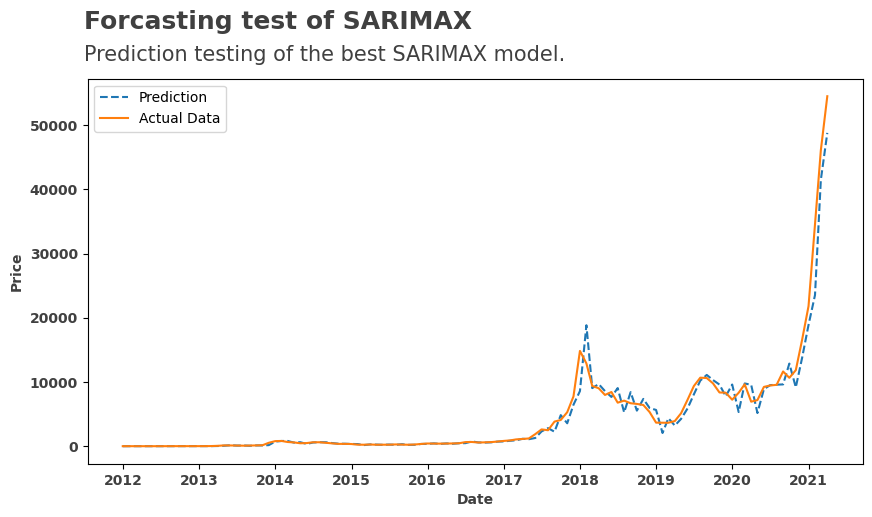

In [33]:
import datetime
from pandas.tseries.offsets import DateOffset
from pandas.tseries.offsets import MonthEnd

ax, fig = plt.subplots(figsize = (10,5))

plt.plot(df_month_prediction["Forcasting"], ls="--", label="Prediction")
plt.plot(df_month_prediction["Weighted_Price"], label="Actual Data")

plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=65000, s="Forcasting test of SARIMAX",
fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=60000, s="Prediction testing of the best SARIMAX model.",
         fontsize=15, alpha=0.75)

plt.show()

In [34]:
#Datetimeindex dates I want to predict

future_dates = [df_month_prediction.index[-1] + DateOffset(months = x)for x in range(1,25)]
future_dates = pd.to_datetime(future_dates)  +  MonthEnd(0)
future = pd.DataFrame(index=future_dates)
df_month_prediction = pd.concat([df_month_prediction,future])

In [35]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2023-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2023-03-31"))
pred_ci = pred.conf_int()

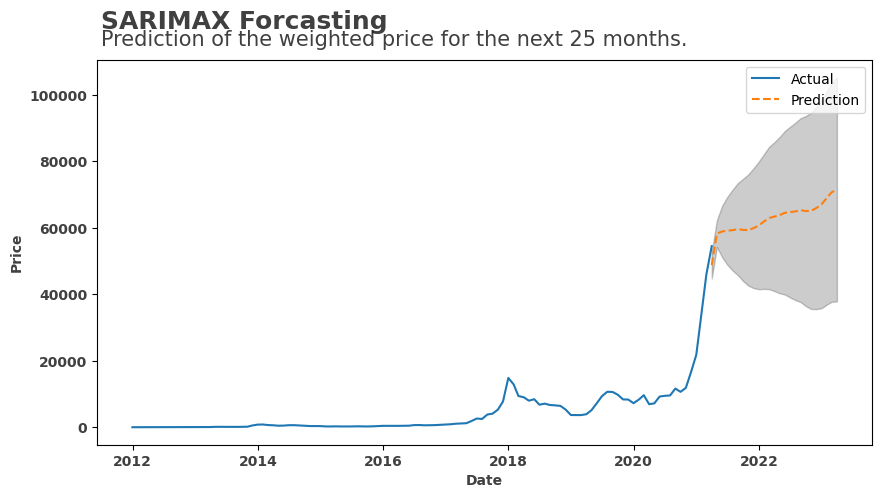

In [36]:
ax, fig = plt.subplots(figsize=(10,5))

plt.plot(df_month_prediction["Weighted_Price"], label="Actual")
plt.plot(df_month_prediction["Future_forcast"],ls="--", label="Prediction")

plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()


plt.xticks(alpha=0.75, weight="bold")
plt.yticks(alpha=0.75, weight="bold")

plt.xlabel("Date",alpha=0.75, weight="bold")
plt.ylabel("Price",alpha=0.75, weight="bold")

plt.legend()

plt.text(x=datetime.date(2011, 6, 30), y=120000, s="SARIMAX Forcasting",
fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=115000, s="Prediction of the weighted price for the next 25 months.",
         fontsize=15, alpha=0.75)

plt.show()

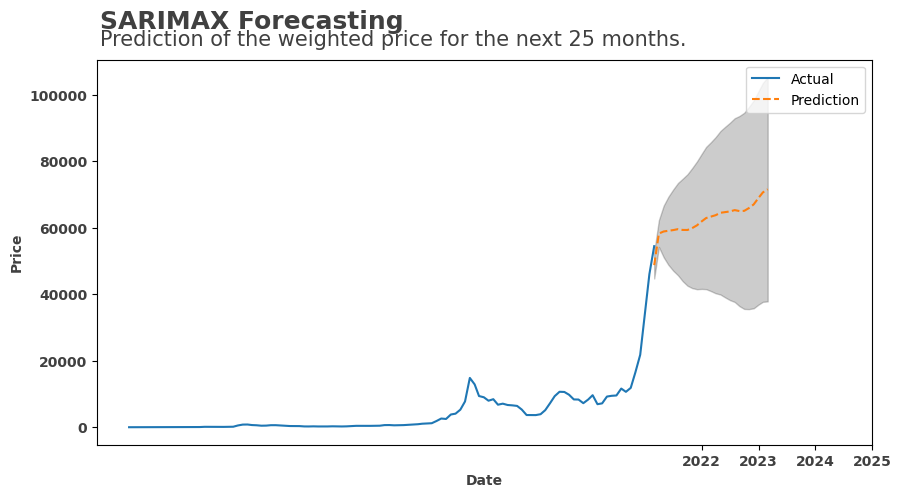

In [37]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.plot(df_month_prediction["Weighted_Price"], label="Actual")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Prediction")
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()

# Set explicit ticks for the years 2022, 2023, 2024, and 2025
plt.xticks([pd.to_datetime("2022-01-31"), pd.to_datetime("2023-01-31"), pd.to_datetime("2024-01-31"), pd.to_datetime("2025-01-31")],
           ["2022", "2023", "2024", "2025"], alpha=0.75, weight="bold")

plt.yticks(alpha=0.75, weight="bold")
plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Price", alpha=0.75, weight="bold")

plt.text(x=datetime.date(2011, 6, 30), y=120000, s="SARIMAX Forecasting",
         fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=115000, s="Prediction of the weighted price for the next 25 months.",
         fontsize=15, alpha=0.75)
plt.show()

In [55]:
#Datetimeindex dates I want to predict

future_dates = [df_month_prediction.index[-1] + DateOffset(months = x)for x in range(1,150)]
future_dates = pd.to_datetime(future_dates)  +  MonthEnd(0)
future = pd.DataFrame(index=future_dates)
df_month_prediction = pd.concat([df_month_prediction,future])

In [49]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2027-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2027-03-31"))
pred_ci = pred.conf_int()

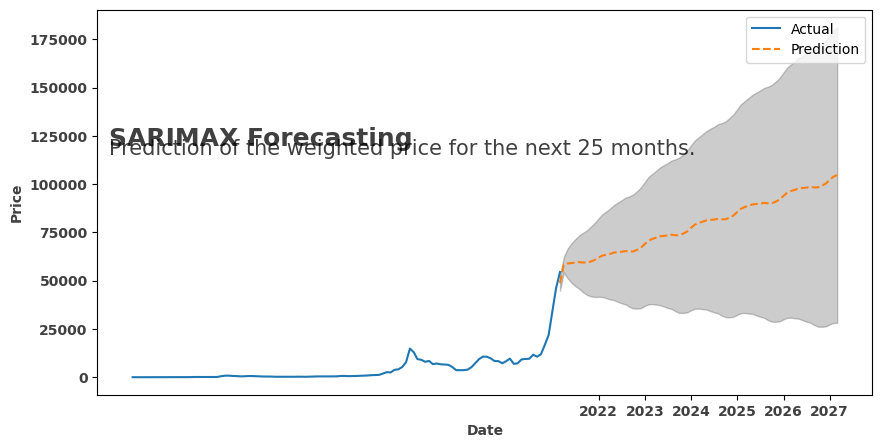

In [51]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.plot(df_month_prediction["Weighted_Price"], label="Actual")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Prediction")
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()

# Set explicit ticks for the years 2022, 2023, 2024, and 2025
plt.xticks([pd.to_datetime("2022-01-31"), pd.to_datetime("2023-01-31"), pd.to_datetime("2024-01-31"), pd.to_datetime("2025-01-31"), pd.to_datetime("2026-01-31"), pd.to_datetime("2027-01-31")],
           ["2022", "2023", "2024", "2025", '2026', '2027'], alpha=0.75, weight="bold")

plt.yticks(alpha=0.75, weight="bold")
plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Price", alpha=0.75, weight="bold")

plt.text(x=datetime.date(2011, 6, 30), y=120000, s="SARIMAX Forecasting",
         fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=115000, s="Prediction of the weighted price for the next 25 months.",
         fontsize=15, alpha=0.75)
plt.show()
#----------------


In [56]:
#Prediction

df_month_prediction["Future_forcast"] = model.predict(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2030-03-31"))

pred = model.get_prediction(start=pd.to_datetime("2021-03-31"),end=pd.to_datetime("2030-03-31"))
pred_ci = pred.conf_int()

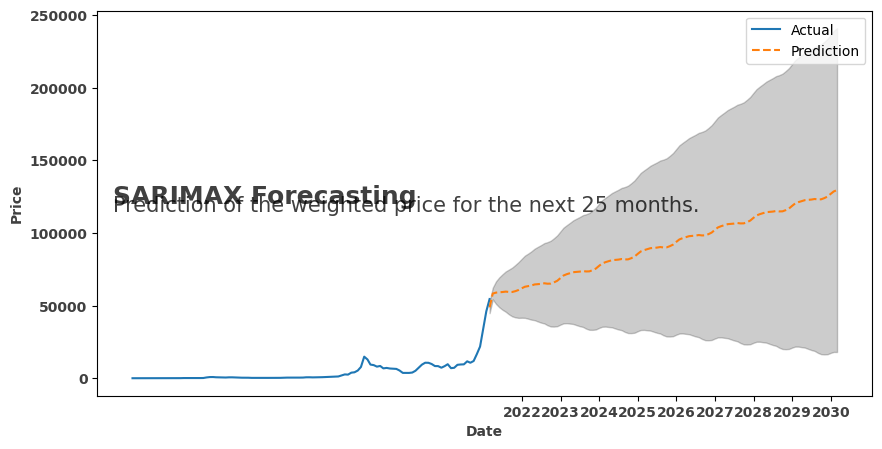

In [57]:
ax, fig = plt.subplots(figsize=(10, 5))
plt.plot(df_month_prediction["Weighted_Price"], label="Actual")
plt.plot(df_month_prediction["Future_forcast"], ls="--", label="Prediction")
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()

# Set explicit ticks for the years 2022, 2023, 2024, and 2025
plt.xticks([pd.to_datetime("2022-01-31"), pd.to_datetime("2023-01-31"), pd.to_datetime("2024-01-31"), pd.to_datetime("2025-01-31"), pd.to_datetime("2026-01-31"), pd.to_datetime("2027-01-31"), pd.to_datetime("2028-01-31"), pd.to_datetime("2029-01-31"), pd.to_datetime("2030-01-31")],
           ["2022", "2023", "2024", "2025", '2026', '2027','2028','2029','2030'], alpha=0.75, weight="bold")

plt.yticks(alpha=0.75, weight="bold")
plt.xlabel("Date", alpha=0.75, weight="bold")
plt.ylabel("Price", alpha=0.75, weight="bold")

plt.text(x=datetime.date(2011, 6, 30), y=120000, s="SARIMAX Forecasting",
         fontsize=18, weight="bold", alpha=0.75)
plt.text(x=datetime.date(2011, 6, 30), y=115000, s="Prediction of the weighted price for the next 25 months.",
         fontsize=15, alpha=0.75)
plt.show()
#----------------
